<a href="https://colab.research.google.com/github/DanielGirald/Senalesysistemas/blob/main/Parcial_1_Senales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene un microprocesador de 5 bits con entrada análoga de -3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalización para la señal:

$$
x(t) = 20\sin\left(7t - \frac{\pi}{2}\right) - 3\cos(5t) + 2\cos(10t)
$$

Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos períodos de la señal estudiada.

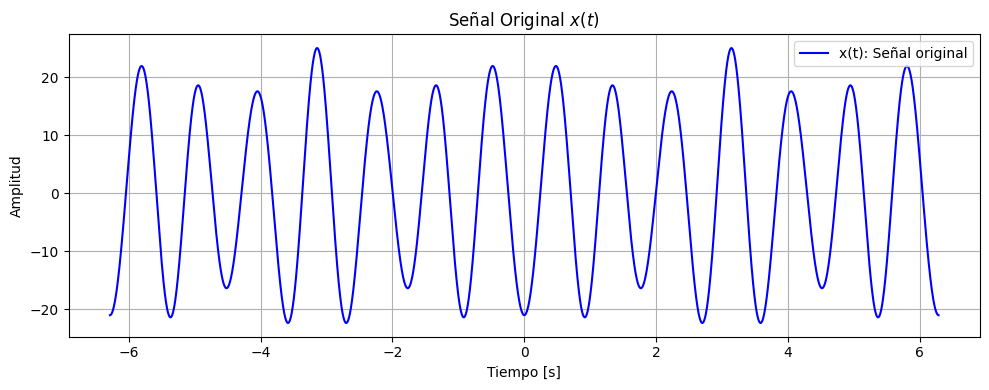

In [ ]:
Fs = 1000             # Frecuencia de muestreo (Hz)
Ts = 1 / Fs            # Período de muestreo
To = 2 * np.pi         # Período fundamental de la señal
tv = np.arange(-To,To, Ts)  # Dos períodos de la señal

# Definir la señal original
xv = 20 * np.sin(7 * tv - np.pi/2) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

# Graficar la señal original
plt.figure(figsize=(10, 4))
plt.plot(tv, xv, label='x(t): Señal original', color='blue')
plt.title('Señal Original $x(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

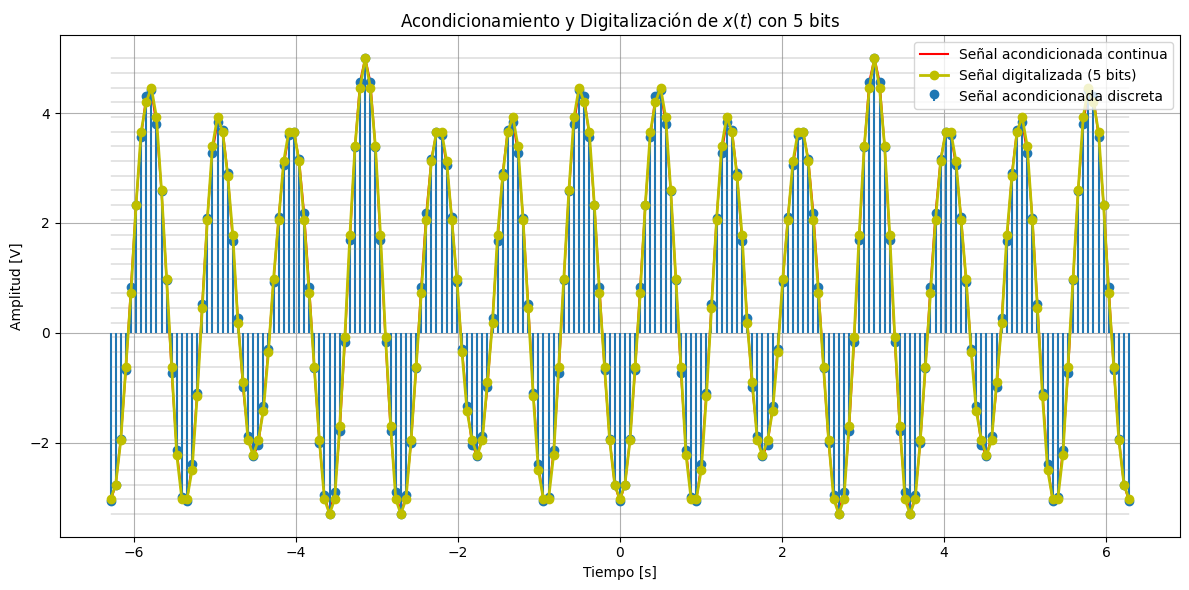

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# ▶️ Paso 1: Generar la señal original x(t)
Fo_max = 10 / (2 * np.pi)      # Frecuencia máxima (de cos(10t)) en Hz
Fs = 10 * Fo_max               # Frecuencia de muestreo (cumple Nyquist)
Ts = 1 / Fs                    # Período de muestreo
To = 2 * np.pi                 # Período fundamental (por MCD de ω)
tv = np.arange(-To, To, Ts)    # Dos periodos de simulación

# Definición de la señal
xv = 20 * np.sin(7 * tv - np.pi/2) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

# ▶️ Paso 2: Acondicionamiento (Cero y Pendiente)
xmin = xv.min()
xmax = xv.max()
ymin = -3.3  # límite inferior del ADC
ymax = 5.0   # límite superior del ADC

# Aplicación de fórmula: y = [(x - xmin)/(xmax - xmin)] * (ymax - ymin) + ymin
yv = ((xv - xmin) / (xmax - xmin)) * (ymax - ymin) + ymin

# ▶️ Paso 3: Cuantización con 5 bits
nbits = 5
niveles = 2**nbits
ve = np.linspace(ymin, ymax, niveles)  # niveles uniformes

# Cálculo de distancias para cuantizar
d = cdist(yv.reshape(-1, 1), ve.reshape(-1, 1))  # Distancias Euclídeas
ind = np.argmin(d, axis=1)                      # Índice del nivel más cercano
yq = ve[ind]                                    # Señal cuantizada (digitalizada)

# ▶️ Paso 4: Visualización
plt.figure(figsize=(12, 6))

# Señal acondicionada continua
plt.plot(tv, yv, c='r', label='Señal acondicionada continua')

# Señal acondicionada discreta
plt.stem(tv, yv, label='Señal acondicionada discreta', basefmt=" ")

# Líneas horizontales: niveles de cuantización
for v in ve:
    plt.plot(tv, v * np.ones_like(tv), color='gray', linewidth=0.3)

# Señal digital (cuantizada)
plt.plot(tv, yq, c='y', marker='o', label='Señal digitalizada (5 bits)', linewidth=2)

# Detalles del gráfico
plt.title('Acondicionamiento y Digitalización de $x(t)$ con 5 bits')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. ¿Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5 kHz, aplicado a la señal

$x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$

 Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.





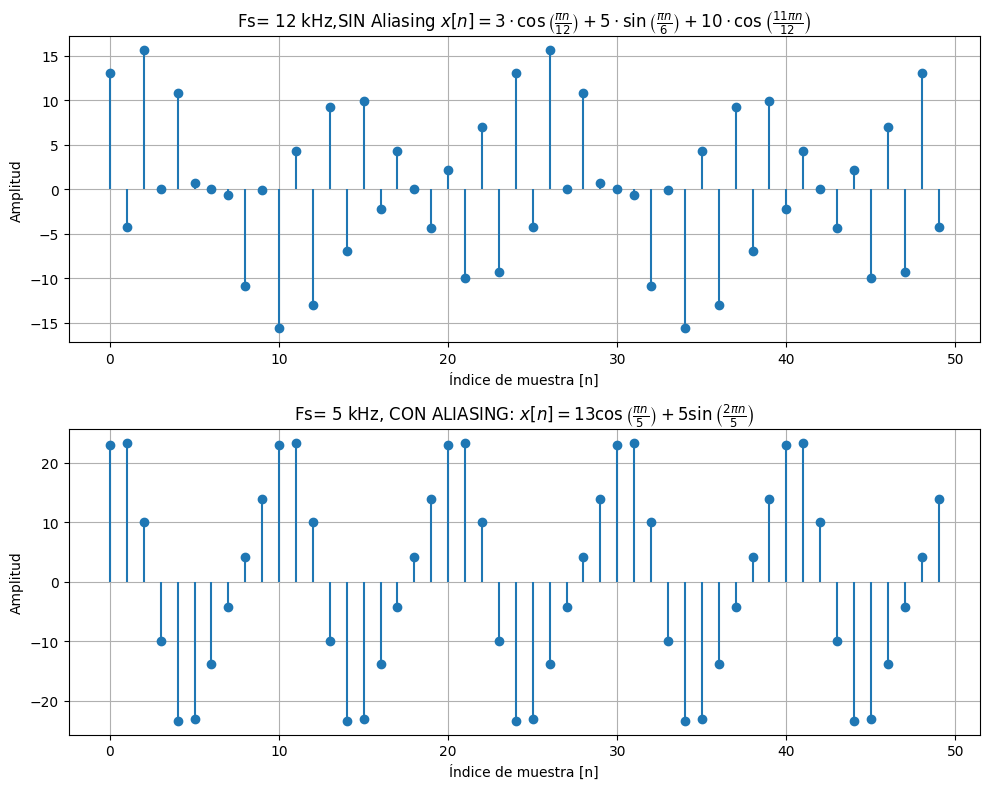

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
n = np.arange(0, 50)

#Ts_5k = np.arange(0, 0.005, 1/Fs_5k)

# Señal sin aliasing (Fs = 12 kHz)
x_12kHz = 3 * np.cos(np.pi * n/12) + 5 * np.sin((np.pi * n)/6) + 10 * np.cos((11 * np.pi * n)/12)

# Señal con aliasing (Fs = 5 kHz)
x_alias = 13 * np.cos((np.pi / 5) * n) + 5 * np.sin((2 * np.pi / 5) * n) + 10 * np.cos((11 * np.pi * n)/5)

# Graficar por separado
plt.figure(figsize=(10, 8))

# Señal sin aliasing 12kHz
plt.subplot(2, 1, 1)
plt.stem(n, x_12kHz, basefmt=" ")
plt.title(r'Fs= 12 kHz,SIN Aliasing $x[n] = 3 \cdot \cos\left(\frac{\pi n}{12}\right) + 5 \cdot \sin\left(\frac{\pi n}{6}\right) + 10 \cdot \cos\left(\frac{11\pi n}{12}\right)$')
plt.xlabel('Índice de muestra [n]')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal con aliasing 5kHz
plt.subplot(2, 1, 2)
plt.stem(n, x_alias, basefmt=" ")
plt.title(r'Fs= 5 kHz, CON ALIASING: $x[n] = 13\cos\left(\frac{\pi n}{5}\right) + 5\sin\left(\frac{2\pi n}{5}\right)$')
plt.xlabel('Índice de muestra [n]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()




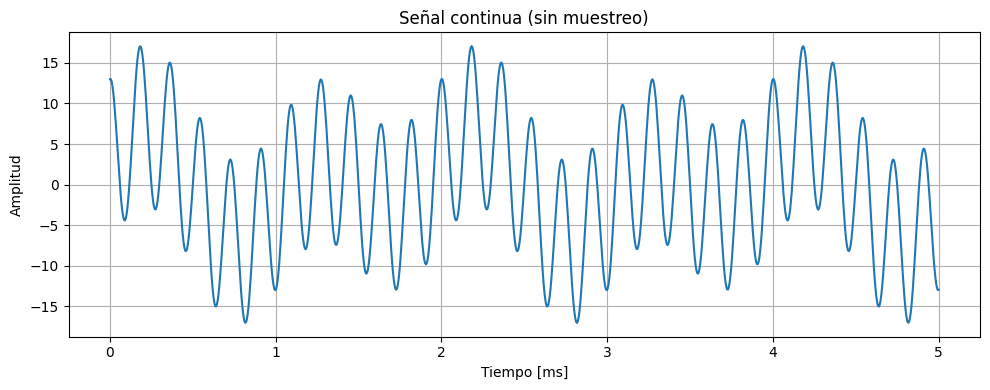

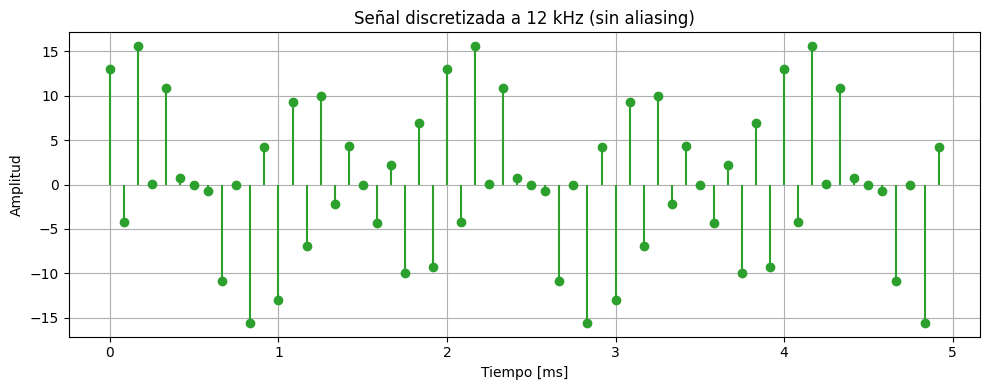

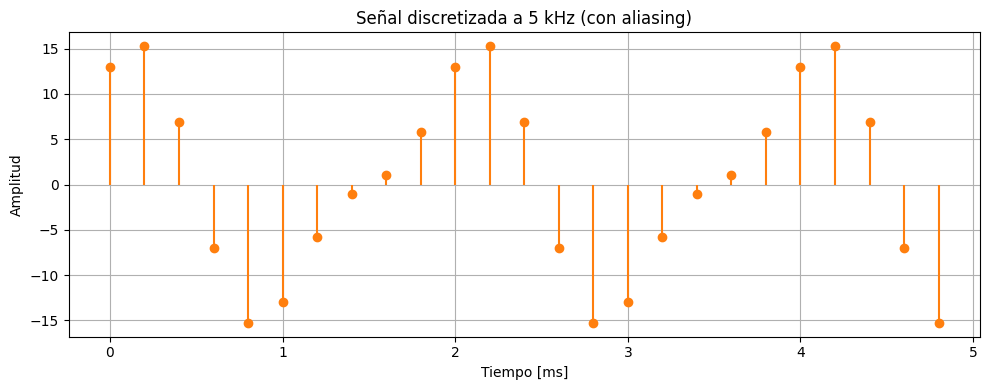

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A1, A2, A3 = 3, 5, 10
w1 = 1000 * np.pi   # 500 Hz
w2 = 2000 * np.pi   # 1000 Hz
w3 = 11000 * np.pi  # 5500 Hz

# Señal continua
t_cont = np.linspace(0, 0.005, 1000)
x_cont = A1 * np.cos(w1 * t_cont) + A2 * np.sin(w2 * t_cont) + A3 * np.cos(w3 * t_cont)

# Señal discretizada fs = 5 kHz
fs_5k = 5000
t_5k = np.arange(0, 0.005, 1/fs_5k)
x_5k = A1 * np.cos(w1 * t_5k) + A2 * np.sin(w2 * t_5k) + A3 * np.cos(w3 * t_5k)

# Señal discretizada fs = 12 kHz
fs_12k = 12000
t_12k = np.arange(0, 0.005, 1/fs_12k)
x_12k = A1 * np.cos(w1 * t_12k) + A2 * np.sin(w2 * t_12k) + A3 * np.cos(w3 * t_12k)

# Gráfica 1: Señal continua
plt.figure(figsize=(10, 4))
plt.plot(t_cont * 1000, x_cont, label='Señal continua', linewidth=1.5)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal continua (sin muestreo)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica 2: Muestreo a 12 kHz
plt.figure(figsize=(10, 4))
plt.stem(t_12k * 1000, x_12k, linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal discretizada a 12 kHz (sin aliasing)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica 3: Muestreo a 5 kHz
plt.figure(figsize=(10, 4))
plt.stem(t_5k * 1000, x_5k, linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal discretizada a 5 kHz (con aliasing)')
plt.grid(True)
plt.tight_layout()
plt.show()




La distancia media entre dos señales $x_1(t),\ x_2(t) \in \mathbb{R},\ \mathbb{C}$ se puede expresar a partir de la potencia media:
$d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt$

$\textbf{Sean } x_1(t) \text{ y } x_2(t):$

$x_1(t) = A \cos(w_0 t), \quad w_0 = \frac{2\pi}{T}, \quad T, A \in \mathbb{R}^+$

$$
x_2(t) =
\begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}
$$





In [ ]:
import sympy as sym

# Inicialización
sym.init_printing()
t, T, A = sym.symbols('t T A', real=True, positive=True)
w0 = 2 * sym.pi / T

# Señales
x1 = A * sym.cos(w0 * t)

# Definimos los intervalos por tramos
# I1: [0, T/4] con x2 = 1
expr1 = (x1 - 1)**2
I1 = sym.integrate(expr1, (t, 0, T/4))

# I2: [T/4, 3T/4] con x2 = -1
expr2 = (x1 + 1)**2
I2 = sym.integrate(expr2, (t, T/4, 3*T/4))

# I3: [3T/4, T] con x2 = 1
expr3 = (x1 - 1)**2
I3 = sym.integrate(expr3, (t, 3*T/4, T))

# Sumar los tres tramos
I_total = I1 + I2 + I3

# Calcular distancia media
d = I_total / T

# Mostrar resultado final simplificado
d_simplificada = sym.simplify(d)
sym.pprint(d_simplificada)


 2          
A    4⋅A    
── - ─── + 1
2     π     


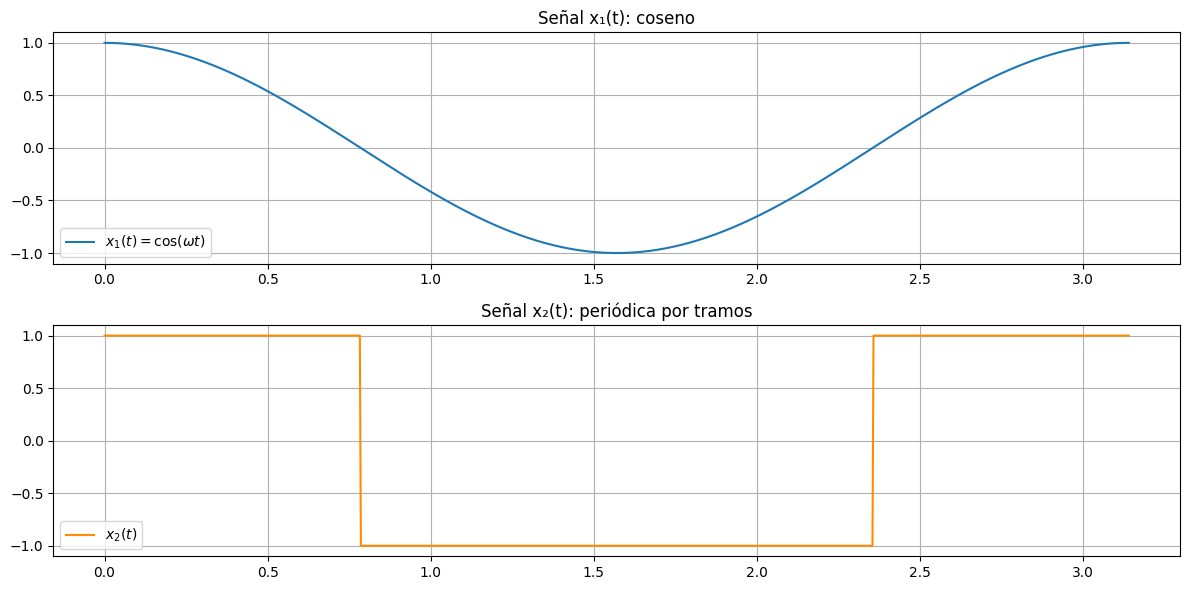

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Frecuencia angular y periodo fundamental
omega = 2
periodo = 2 * np.pi / omega

# Tiempo de evaluación
num_muestras = 1000
tiempo = np.linspace(0, periodo, num_muestras)

# Señal x1(t): coseno
senal_coseno = np.cos(omega * tiempo)

# Definición de la señal por tramos x2(t)
def senal_tramos(t_local, T):
    """Define una señal periódica por tramos dentro de un periodo T"""
    if 0 <= t_local < T / 4:
        return 1
    elif T / 4 <= t_local < 3 * T / 4:
        return -1
    elif 3 * T / 4 <= t_local < T:
        return 1
    else:
        return 0

# Vectorizamos la función por tramos
senal_x2 = np.array([senal_tramos(ti % periodo, periodo) for ti in tiempo])

# Gráficas
plt.figure(figsize=(12, 6))

# Gráfica de la señal coseno
plt.subplot(2, 1, 1)
plt.plot(tiempo, senal_coseno, label=r'$x_1(t) = \cos(\omega t)$')
plt.title("Señal x₁(t): coseno")
plt.grid(True)
plt.legend()

# Gráfica de la señal por tramos
plt.subplot(2, 1, 2)
plt.plot(tiempo, senal_x2, color='darkorange', label=r'$x_2(t)$')
plt.title("Señal x₂(t): periódica por tramos")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


4.  Sea $x′′(t)$ la segunda derivada de la señal $x(t)$, donde $t$ $∈$ $[ti, tf]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$
c_{n}=\frac{1}{(ti-tf)n^{2}w_{o}^{2}}\int_{t_i}^{t_f}x^{''}(t)e^{-jnw_{o}t}dt;\quad n\in\mathbb{Z}
$$
¿Cómo se pueden calcular los coeficientes an y bn desde $x′′(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n∈{0,±1,±2,±3,±4,±5}$, a partir de $x′′(t)$ para la señal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

$$
c_n = \frac{1}{(t_i - t_f)n^2 w_0^2} \int_{t_i}^{t_f} x''(t)e^{-jnw_0 t} \, dt; \quad n \in \mathbb{Z}.
$$









# **señal trapezoidal invertida**

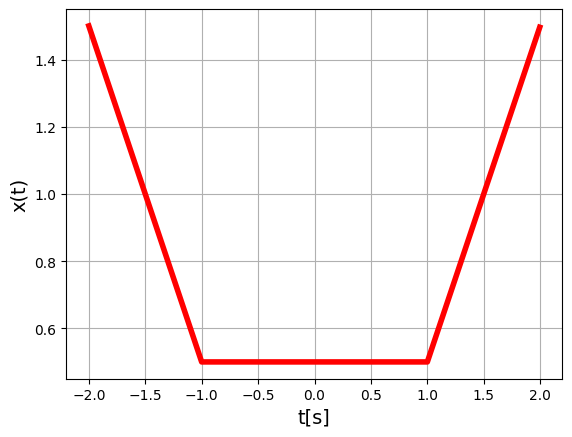

In [6]:
from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact,IntSlider
import numpy as np
import matplotlib.pyplot as plt
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
def funcion_trapecio(x, a, b, c, d):

    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = -funcion_trapecio(tv, -d2, -d1, d1, d2)+1.5



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()


# **bases de Fourier y espectro Cn**

In [7]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

<ipython-input-7-51689c077dbf>:11: RuntimeWarning: invalid value encountered in divide
  Cn = (2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)


# **Grafica del espectro**

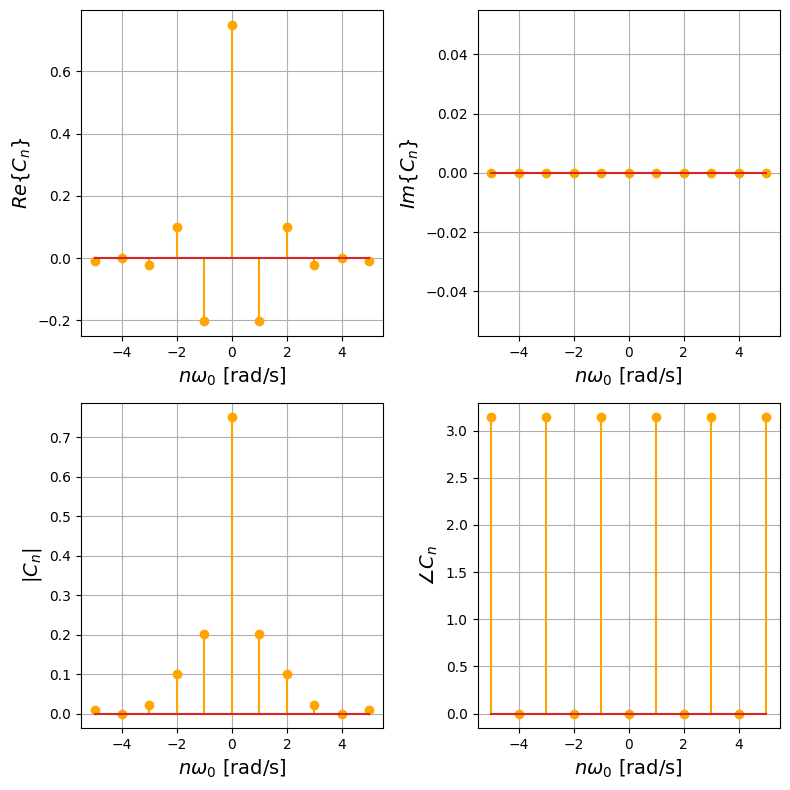

In [8]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

# **reconstrucción y error relativo**

In [10]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))


interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>